In [1]:
import os
import pickle
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [ ]:
def load_data():
    data = []
    labels = []
    for letter in os.listdir('asl_alphabet_train/asl_alphabet_train'):
        print(letter)
        for image in os.listdir('asl_alphabet_train/asl_alphabet_train/' + letter):
            img = Image.open('asl_alphabet_train/asl_alphabet_train/' + letter + '/' + image)
            img = np.array(img)
            data.append(img)
            labels.append(letter)
    return np.array(data), np.array(labels)

data, labels = load_data()


In [3]:
print('Data shape:', data.shape)
print('Labels shape:', labels.shape)
print('Unique labels:', np.unique(labels))

Data shape: (86999, 200, 200, 3)
Labels shape: (86999,)
Unique labels: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'del' 'nothing' 'space']


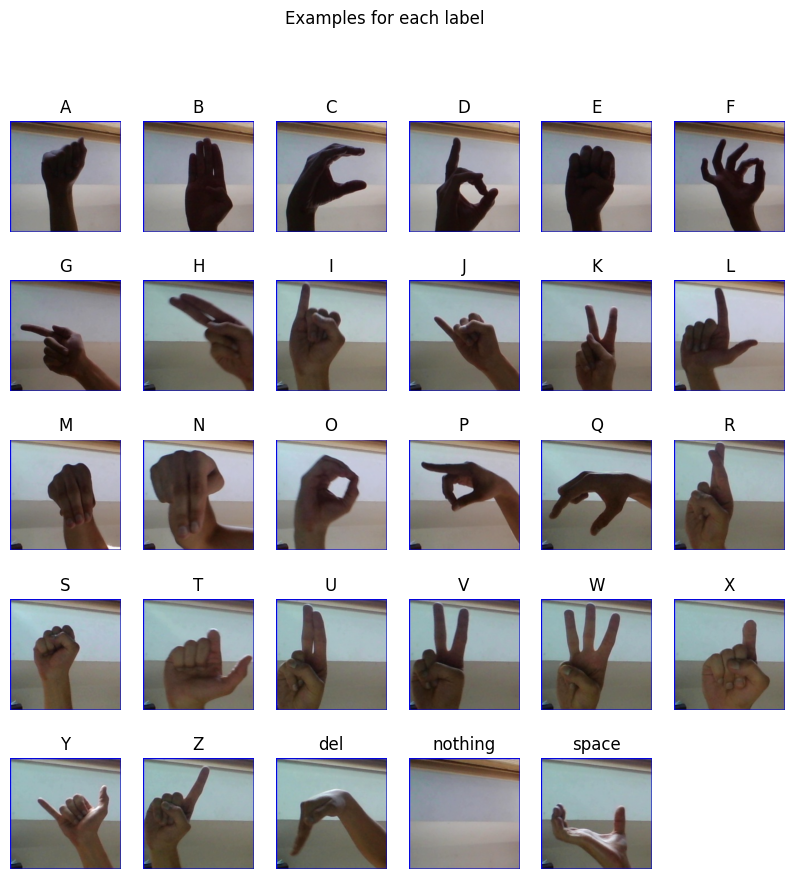

In [15]:
fig, axes = plt.subplots(5, 6, figsize=(10, 10))
fig.suptitle('Examples for each label')
for i, ax in enumerate(axes.flat):
    ax.imshow(data[labels == np.unique(labels)[i]][0])
    ax.axis('off')
    ax.set_title(np.unique(labels)[i])
    if i == 28:
        break
axes[4, 5].axis('off')
plt.show()


In [5]:
np.save('data.npy', data)
np.save('labels.npy', labels)

In [14]:
data = np.load('data.npy')
labels = np.load('labels.npy')

In [18]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_encoded = to_categorical(labels_encoded)

print('Labels shape:', labels_encoded.shape)
print('Labels example:', labels_encoded[0])

Labels shape: (86999, 29)
Labels example: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
